# Generating Synthetic Data


To validate the base model’s performance, we tested it on synthetic user data, an incredibly useful approach when device-level data is not yet available or too sensitive to share during early-stage development. Working with synthetic data, we can replicate device scope 2 emissions avoidance potential with and without an automated marginal emissions reduction solution.

Ideally, the base solution’s short-term impact will be in shortening the product development lifecycle of custom software solutions designed to support AER features. To shape the base model, we worked with WattTime to isolate a common set of functional behaviors for potential low-carbon devices and translate these patterns and users’ behavior into mathematical functions that can be optimized. This first set is intended to serve as a base model for more complex solutions. 

We anticipate that different customers will want to build on the base model in various ways, further enhancing the efficiency of the base model. When extending the base model, it’s important that the energy transmission and customer behaviors are knowable and systematic. For example, battery charging is relatively straightforward. We can represent user behavior as numerical variables, and the power consumption patterns of batteries are relatively simple. On the other hand, accurate smart thermostat energy transmission modeling requires data inputs on space-specific thermodynamics — the physical characteristics of the room — and contextual user preferences for heating and cooling based on how they occupy each space. Optimizing this use case is possible, but the solution is not necessarily generalizable to other industries, nor is the data readily available. Expanding to this use case should be possible for customers with intimate knowledge of smart thermostat devices, because the base model can interact with a broad range of inputs and supplemental models.

In [1]:
import os
os.chdir(path=os.path.dirname(os.path.dirname(os.path.abspath(os.curdir))))

In [2]:
from watttime_optimizer.evaluator.sessions import SessionsGenerator

## Example: At home EV charging

Ideally, the base solution’s short-term impact will be in shortening the product development lifecycle of custom software solutions designed to support AER features. To shape the base model, we worked with WattTime to isolate a common set of functional behaviors for potential low-carbon devices and translate these patterns and users’ behavior into mathematical functions that can be optimized. This first set is intended to serve as a base model for more complex solutions. 


### Functional Behavior + Device Characteristics
- Covers a 5.5 - 8.5 hour variable length window
- The vehicle has a BMW and has an average power draw of 42.5
- Battery is usually typically 50% charged at plug in time.
- Charging occurs during the workdayz

In [3]:
ev_kwargs = {
    "max_power_output_rates": [42.5],
    "max_percent_capacity": 0.95,  # highest level of charge achieved by battery
    "power_output_efficiency": 0.75,  # power loss. 1 = no power loss.
    "minimum_battery_starting_capacity": 0.2,  # minimum starting percent charged
    "minimum_usage_window_start_time": "08:00:00",  # session can start as early as 8am
    "maximum_usage_window_start_time": "22:00:00",  # session can start as late as 9pm
}

In [4]:
s_ev = SessionsGenerator(**ev_kwargs)

Now we can generate synthetic data for users and devices with the attributes set above.

In [5]:
# the class has a helper function to generate a random list of unique dates
distinct_date_list = s_ev.assign_random_dates(years=[2025])

You can generate data for a *single* user for each distinct date

In [6]:
s_ev.synthetic_user_data(distinct_date_list=[distinct_date_list[0]]).T

,0
distinct_dates,2025-01-08
user_type,r30.685_tc119_avglc25355_sdlc7492
usage_window_start,2025-01-08 13:30:00
usage_window_end,2025-01-08 21:05:00
initial_charge,0.641924
time_needed,71.685273
expected_baseline_charge_complete_timestamp,2025-01-08 14:41:41.116373064
window_length_in_minutes,455.0
final_charge_time,2025-01-08 14:41:41.116373064
total_capacity,119


Or for *multiple* users.

In [7]:
s_ev.generate_synthetic_dataset(distinct_date_list=[distinct_date_list[0]], number_of_users=10)

100%|██████████| 10/10 [00:00<00:00, 306.60it/s]


,index,distinct_dates,user_type,usage_window_start,usage_window_end,initial_charge,time_needed,expected_baseline_charge_complete_timestamp,window_length_in_minutes,final_charge_time,total_capacity,usage_power_kw,total_intervals_plugged_in,MWh_fraction,early_session_stop
0,0,2025-01-08,r29.367499999999996_tc35_avglc26444_sdlc6919,2025-01-08 19:20:00,2025-01-09 03:55:00,0.274689,48.289854,2025-01-08 20:08:17.391226626,515.0,2025-01-08 20:08:17.391226626,35,29.3675,103.0,0.002447,False
1,0,2025-01-08,r24.0125_tc103_avglc24950_sdlc7383,2025-01-08 19:40:00,2025-01-09 03:50:00,0.381998,146.184329,2025-01-08 22:06:11.059764642,490.0,2025-01-08 22:06:11.059764642,103,24.0125,98.0,0.002001,False
2,0,2025-01-08,r36.7625_tc21_avglc27492_sdlc6913,2025-01-08 16:35:00,2025-01-09 01:40:00,0.525711,14.542111,2025-01-08 16:49:32.526643320,545.0,2025-01-08 16:49:32.526643320,21,36.7625,109.0,0.003064,False
3,0,2025-01-08,r23.46_tc61_avglc25809_sdlc6886,2025-01-08 10:35:00,2025-01-08 15:50:00,0.609764,53.080252,2025-01-08 11:28:04.815120102,315.0,2025-01-08 11:28:04.815120102,61,23.4600,63.0,0.001955,False
4,0,2025-01-08,r27.837500000000002_tc25_avglc25929_sdlc7815,2025-01-08 18:50:00,2025-01-09 00:30:00,0.242590,38.118160,2025-01-08 19:28:07.089588888,340.0,2025-01-08 19:28:07.089588888,25,27.8375,68.0,0.002320,False
5,0,2025-01-08,r29.1125_tc71_avglc25744_sdlc7728,2025-01-08 08:50:00,2025-01-08 14:45:00,0.337639,89.606148,2025-01-08 10:19:36.368864478,355.0,2025-01-08 10:19:36.368864478,71,29.1125,71.0,0.002426,False
6,0,2025-01-08,r28.7725_tc42_avglc29451_sdlc6947,2025-01-08 15:00:00,2025-01-08 23:55:00,0.502592,39.185661,2025-01-08 15:39:11.139635364,535.0,2025-01-08 15:39:11.139635364,42,28.7725,107.0,0.002398,False
7,0,2025-01-08,r32.0025_tc74_avglc29795_sdlc7962,2025-01-08 10:25:00,2025-01-08 17:00:00,0.474406,65.983562,2025-01-08 11:30:59.013696186,395.0,2025-01-08 11:30:59.013696186,74,32.0025,79.0,0.002667,False
8,0,2025-01-08,r25.84_tc49_avglc20281_sdlc7960,2025-01-08 11:40:00,2025-01-08 19:30:00,0.273532,76.966557,2025-01-08 12:56:57.993437946,470.0,2025-01-08 12:56:57.993437946,49,25.8400,94.0,0.002153,False
9,0,2025-01-08,r25.1175_tc81_avglc24481_sdlc7903,2025-01-08 19:10:00,2025-01-09 01:15:00,0.338141,118.388935,2025-01-08 21:08:23.336099208,365.0,2025-01-08 21:08:23.336099208,81,25.1175,73.0,0.002093,False


## Example: AI Model Training


### Functional Behavior
- Worloads can run at any time of day
- Our 3 server models consume 24, 31, and 64 kWh on average


In [8]:
ai_kwargs = {
    "max_percent_capacity":1.0, # job must run to completion
    "max_power_output_rates": [24,31,64],
    "minimum_usage_window_start_time": "00:00:00",  # earliest session can start
    "maximum_usage_window_start_time": "23:59:00",  # latest session can start
}

In [9]:
s_ai = SessionsGenerator(**ai_kwargs)

In [10]:
df_ai = s_ai.generate_synthetic_dataset(distinct_date_list=distinct_date_list, number_of_users=10)

100%|██████████| 10/10 [00:00<00:00, 333.17it/s]


# Optimization

In [8]:
import pandas as pd
from watttime_optimizer.evaluator.evaluator import OptChargeEvaluator
from watttime_optimizer.evaluator.evaluator import ImpactEvaluator

### The WattTimeOptimizer class requires 4 things:

- Watttime’s forecast of marginal emissions (MOER) - be ready to provide your username and password
- device capacity and energy needs
- region
- window start
- window end

In [9]:
username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")
region = "CAISO_NORTH"
oce = OptChargeEvaluator(username=username,password=password)

# single instance
df_ev_sample = s_ev.synthetic_user_data(distinct_date_list=[distinct_date_list[0]])

In [10]:
input_dict = df_ev_sample[['usage_window_start',
                    'usage_window_end',
                    'time_needed',
                    'usage_power_kw'
                    ]].T.to_dict()

value = input_dict[0]
value.update({'region':region,'tz_convert':True, "verbose":False})

In [11]:
value

{'usage_window_start': Timestamp('2025-01-08 17:25:00'),
 'usage_window_end': Timestamp('2025-01-08 23:00:00'),
 'time_needed': 80.72348693742671,
 'usage_power_kw': 24.182499999999997,
 'region': 'CAISO_NORTH',
 'tz_convert': True,
 'verbose': False}

In [12]:
df = oce.get_schedule_and_cost_api(**value)
rr = ImpactEvaluator(username,password,df).get_all_emissions_values(region=region)

<Axes: xlabel='point_time'>

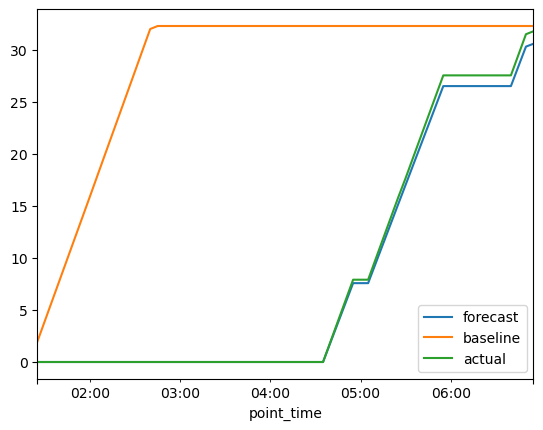

In [13]:
rr.cumsum().plot()

# Requery

The intuition behind requerying is that more recent forecasts more accurately reflect what is likely to happen on the grid within the session window. An extension of this assumption is that the higher the update frequency, the greater the improvement in overall results. 

In [20]:
from watttime_optimizer.evaluator.evaluator import RecalculationOptChargeEvaluator

In [21]:
roce = RecalculationOptChargeEvaluator(username,password)

In [22]:
value.update({"optimization_method": "simple", "interval":15, "charge_per_segment":None})

In [41]:
%%timeit
%%capture
df_requery = roce.fit_recalculator(**value).get_combined_schedule()

4.5 s ± 1.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Vizualizing Results

In [14]:
impact_evaluator = ImpactEvaluator(username=username,password=password,obj=df)

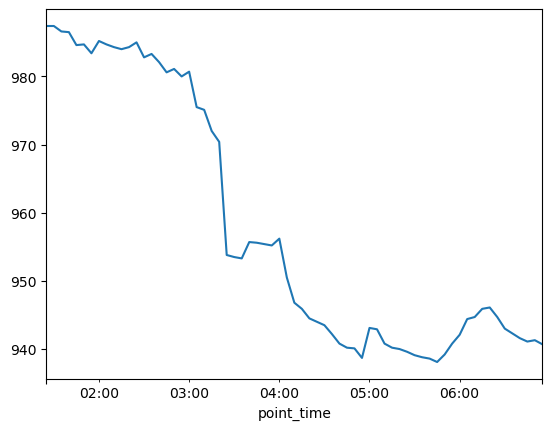

In [15]:
impact_evaluator.plot_predicated_moer()

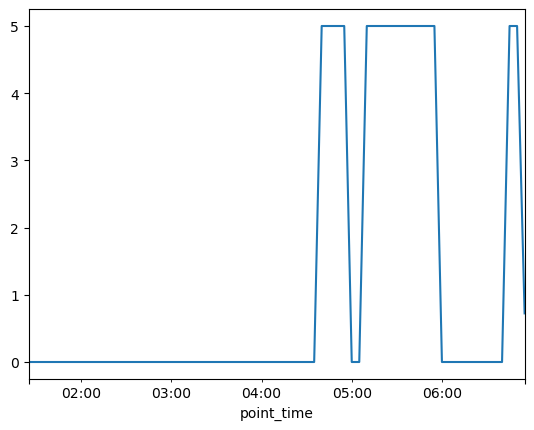

In [16]:
impact_evaluator.plot_usage_schedule()

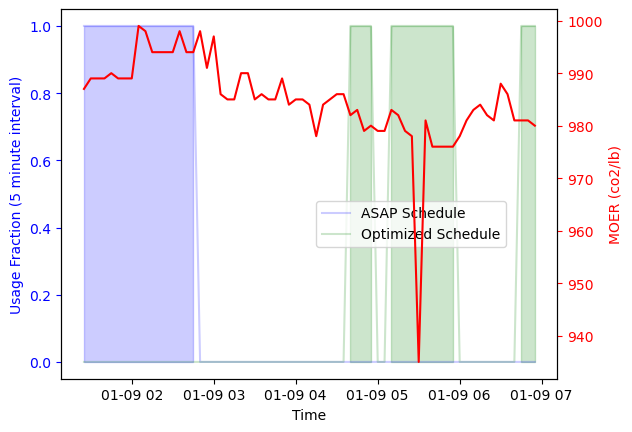

In [18]:
impact_evaluator.plot_impact(region=region)

In [20]:
impact_evaluator.get_all_emissions_metrics(region=region)

{'baseline': 32.283293308785595,
 'forecast': 30.577797566641117,
 'actual': 31.779439306783917}

# Iterate over multiple rows of data

In [39]:
from watttime_optimizer.evaluator.analysis import analysis_loop

In [40]:
df_ev_samples = s_ev.generate_synthetic_dataset(distinct_date_list=distinct_date_list, number_of_users=10).sample(10)

input_dict = df_ev_samples[['usage_window_start',
                    'usage_window_end',
                    'time_needed',
                    'usage_power_kw'
                    ]].T.to_dict()

100%|██████████| 10/10 [00:00<00:00, 262.90it/s]


In [41]:
results = analysis_loop(
    region = "CAISO_NORTH",
    input_dict = input_dict,
    username=username,
    password=password
)

100%|██████████| 10/10 [00:48<00:00,  4.87s/it]


In [43]:
results_loop = pd.DataFrame.from_dict(
    results,
    orient="index"
    )

In [49]:
results_loop

,baseline,forecast,actual,m,b,stddev
74,18.785587,17.989601,18.131132,-0.153361,958.348989,4.492026
87,7.239583,9.885909,7.149756,7.037200,-64.524592,306.813320
164,3.531891,4.478827,27.828149,-2.277382,350.811568,110.248641
36,51.959712,49.601364,51.277886,-0.850466,987.026339,16.902915
98,18.336274,11.711657,17.373445,6.201609,22.024319,214.884382
249,67.523255,64.249195,66.979611,-0.395036,978.947001,15.076282
81,55.829117,53.346816,53.685575,-0.475130,961.037489,10.587760
10,32.056373,30.638461,30.998585,-0.485953,964.179230,11.088391
27,6.885002,8.666217,7.030633,11.099877,-47.994144,399.276077
241,13.175851,12.180933,13.041130,-0.024084,947.862326,9.670335
